In [5]:
#Defensive stats for teams
import os
os.chdir(r"/Users/jordandass/FPL/All stats")
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 
from webdriver_manager.chrome import ChromeDriverManager

PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/defense/Premier-League-Stats"

driver.get(url)

columns = ["Squad",	"Pl",	"90s",	"Tackles Tkl",	"Tackles TklW",	"Tackles Def 3rd",	"Tackles Mid 3rd",	"Tackles Att 3rd",	"Vs Dribbles Tkl",	"Vs Dribbles Att",	"Vs Dribbles Tkl%",	"Vs Dribbles Past",	"Pressures Press",	"Pressures Succ", "Pressures %",	"Pressures Def 3rd",	"Pressures Mid 3rd",	"Pressures Att 3rd",	"Blocks",	"Sh",	"ShSv",	"Pass",	"Int",	"Tkl+Int",	"Clr",	"Er"]

array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
for num in range(1, 21):
    try:
        team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_defense_for"]/tbody/tr['+str(num)+']')
        team_dat = str(team_dat.text)
        team_name = re.findall(all_team_space, team_dat)[0]
        team_dat = re.sub(team_name, '', team_dat)
        list_team_dat = team_dat.split(' ')
        full_list_team_dat = [team_name.strip()] + list_team_dat
        array.append(full_list_team_dat)
    except:
        break

pd.DataFrame(array, columns = columns).to_csv("Teams_def_data.csv")


driver.find_element_by_xpath('//*[@id="all_stats_squads_defense"]/div[3]/div[2]/a').click()
time.sleep(3)
array = []
all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_defense_against"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Opponent_def_data_agaisnt_team.csv")

driver.quit()



url = "https://fbref.com/en/comps/9/possession/Premier-League-Stats"

driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get(url)

columns = ["Squad","Pl","Poss","90s","Touches","Touches Def Pen","Touches Def 3rd","Touches Mid 3rd","Touches Att 3rd","Touches Att Pen","Touches Live","Dribbles Succ","Dribbles Att","Dribbles Succ%","Dribbles #Pl","Dribbles Megs","Carries","Carries TotDist","Carries	PrgDist","Carries Prog","Carries 1/3","Carries CPA","Carries Mis","Carries Dis","Receiving Targ","Receiving Rec","Receiving Rec%","Receiving Prog"]

array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
for num in range(1, 21):
    try:
        team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_possession_for"]/tbody/tr['+str(num)+']')
        team_dat = str(team_dat.text)
        team_name = re.findall(all_team_space, team_dat)[0]
        team_dat = re.sub(team_name, '', team_dat)
        list_team_dat = team_dat.split(' ')
        full_list_team_dat = [team_name.strip()] + list_team_dat
        array.append(full_list_team_dat)
    except:
        break

pd.DataFrame(array, columns = columns).to_csv("Teams_poss_data.csv")


driver.find_element_by_xpath('//*[@id="all_stats_squads_possession"]/div[3]/div[2]/a').click()
time.sleep(2)
array = []
all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_possession_against"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Opponent_poss_data_agaisnt_team.csv")

driver.quit()


driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/shooting/Premier-League-Stats"

driver.get(url)

columns = ["Squad","# Pl","90s","Gls","Sh","SoT","SoT%","Sh/90","SoT/90","G/Sh","G/SoT","Dist","FK","PK","PKatt","xG","npxG","npxG/Sh","G-xG","np:G-xG"]


array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('/html/body/div[2]/div[6]/div[2]/div[4]/div[1]/table/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Teams_shot_data.csv")


driver.find_element_by_xpath('//*[@id="all_stats_squads_shooting"]/div[3]/div[2]/a').click()
time.sleep(2)

array = []
all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_shooting_against"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Opponent_shot_data_agaisnt_team.csv")

driver.quit()

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/gca/Premier-League-Stats"

driver.get(url)

columns = ["Squad","# Pl","90s","SCA", "SCA 90", "SCA PassLive", "SCA PassDead", "SCA Drib", "SCA Sh", "SCA Fld", "SCA Def", "GCA", "GCA 90", "GCA PassLive", "GCA PassDead", "GCA Drib", "GCA Sh", "GCA Fld", "GCA Def"]

array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_gca_for"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Teams_gca_data.csv")


driver.find_element_by_xpath('//*[@id="all_stats_squads_gca"]/div[3]/div[2]/a').click()
time.sleep(2)

array = []
all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_gca_against"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Opponent_gca_data_agaisnt_team.csv")

driver.quit()


driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/passing/Premier-League-Stats"

driver.get(url)

columns = ['Squad', 'Pl', '90s', 'Total Cmp', 'Total Att', 'Total Cmp%', 'Total TotDist', 'Total PrgDist', 'Short Cmp', 'Short Att', 'Short Cmp%', 'Med Cmp', 'Med Att', 'Med Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']

array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
for num in range(1, 21):
    try:
        team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_passing_for"]/tbody/tr['+str(num)+']')
        team_dat = str(team_dat.text)
        team_name = re.findall(all_team_space, team_dat)[0]
        team_dat = re.sub(team_name, '', team_dat)
        list_team_dat = team_dat.split(' ')
        full_list_team_dat = [team_name.strip()] + list_team_dat
        array.append(full_list_team_dat)
    except:
        break

pd.DataFrame(array, columns = columns).to_csv("Teams_pass_data.csv")


driver.find_element_by_xpath('//*[@id="all_stats_squads_passing"]/div[3]/div[2]/a').click()
time.sleep(2)
array = []
all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_passing_against"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Opponent_pass_data_agaisnt_team.csv")

driver.quit()



[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/95.0.4638.54/chromedriver] found in cache
[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/95.0.4638.54/chromedriver] found in cache
[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/95.0.4638.54/chromedriver] found in cache
[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/95.0.4638.54/c

In [14]:
#Defensive stats for players

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 
import numpy as np
PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/defense/Premier-League-Stats"

driver.get(url)

columns = ["Player","Nation","Pos","Squad","Age","Born","90s",	"Tackles Tkl",	"Tackles TklW",	"Tackles Def 3rd",	"Tackles Mid 3rd",	"Tackles Att 3rd",	"Vs Dribbles Tkl",	"Vs Dribbles Att",	"Vs Dribbles Tkl%",	"Vs Dribbles Past",	"Pressures Press",	"Pressures Succ%",	"Pressures Def 3rd",	"Pressures Mid 3rd",	"Pressures Att 3rd",	"Blocks",	"Sh",	"ShSv",	"Pass",	"Int",	"Tkl+Int",	"Clr",	"Er"]
array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
positions = '[GKDFMW,]{2,}'
for num in range(1, 455):
    print(num)
    try:
        lists = []
        for td_num, col_name in zip(range(1, 31), columns):
            player_dat = driver.find_element_by_xpath('//*[@id="stats_defense"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
            dat = str(player_dat.text)
            if dat == '':
                dat = np.nan
            if col_name == 'Nation':
                dat = re.findall('[A-Z]+', dat)[0]
            lists.append(dat)
        array.append(lists)
    except:
        continue
    
pd.DataFrame(array, columns = columns).to_csv("Player_defense.csv")
driver.quit()

PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/possession/Premier-League-Stats"

driver.get(url)


columns = ["Player","Nation","Pos","Squad","Age","Born","90s","Touches","Touches Def Pen","Touches Def 3rd","Touches Mid 3rd","Touches Att 3rd","Touches Att Pen","Touches Live","Dribbles Succ","Dribbles Att","Dribbles Succ%","Dribbles #Pl","Dribbles Megs","Carries","Carries TotDist","Carries PrgDist","Carries Prog","Carries 1/3","Carries	CPA","Carries Mis","Carries Dis","Receiving	Targ","Receiving Rec","Receiving Rec%","Receiving Prog"]
array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
positions = '[GKDFMW,]{2,}'
for num in range(1, 455):
    print(num)
    try:
        lists = []
        for td_num, col_name in zip(range(1, 32), columns):
            player_dat = driver.find_element_by_xpath('//*[@id="stats_possession"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
            dat = str(player_dat.text)
            if dat == '':
                dat = np.nan
            if col_name == 'Nation':
                dat = re.findall('[A-Z]+', dat)[0]
            lists.append(dat)
        array.append(lists)
    except:
        continue
    
pd.DataFrame(array, columns = columns).to_csv("Player_possession.csv")
driver.quit()

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/shooting/Premier-League-Stats"

driver.get(url)


columns = ["Player","Nation","Pos","Squad","Age","Born","90s","Gls","Sh","SoT","SoT%","Sh/90","SoT/90","G/Sh","G/SoT","Dist","FK","PK","PKatt","xG","npxG","npxG/Sh","G-xG","np:G-xG"]
array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
positions = '[GKDFMW,]{2,}'
for num in range(1, 455):
    print(num)
    try:
        lists = []
        for td_num, col_name in zip(range(1, 25), columns):
            player_dat = driver.find_element_by_xpath('//*[@id="stats_shooting"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
            dat = str(player_dat.text)
            if dat == '':
                dat = np.nan
            lists.append(dat)
        array.append(lists)
    except:
        continue
    
pd.DataFrame(array, columns = columns).to_csv("Player_shot.csv")
driver.quit()


driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/passing/Premier-League-Stats"

driver.get(url)


columns = ["Player","Nation","Pos","Squad","Age","Born","90s",'Total Cmp', 'Total Att', 'Total Cmp%', 'Total TotDist', 'Total PrgDist', 'Short Cmp', 'Short Att', 'Short Cmp%', 'Med Cmp', 'Med Att', 'Med Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']
array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
positions = '[GKDFMW,]{2,}'
for num in range(1, 455):
    print(num)
    try:
        lists = []
        for td_num, col_name in zip(range(1, 30), columns):
            player_dat = driver.find_element_by_xpath('//*[@id="stats_passing"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
            dat = str(player_dat.text)
            if dat == '':
                dat = np.nan
            lists.append(dat)
        array.append(lists)
    except:
        continue
    
pd.DataFrame(array, columns = columns).to_csv("Player_shot.csv")
driver.quit()




[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/95.0.4638.54/chromedriver] found in cache


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,Factors,Brighton,Aston Villa
0,Poss,6,13
1,Touches Att Pen,9,10
2,xG,17,16
3,G/Sh,15,11
4,G-xG,8,5
5,Pressures %,3,16
6,Sh,12,4


,Factors,Brighton normally,Teams agaisnt Aston Villa,Higher/Lower,% change
0,Poss,54.80,52.50,Lower,-0.041971
1,Touches Att Pen,248.00,235.00,Lower,-0.052419
2,xG,10.70,15.90,Higher,0.485981
3,G/Sh,0.08,0.12,Higher,0.500000
4,G-xG,0.30,2.10,Higher,6.000000
5,Pressures %,30.90,31.10,Higher,0.006472
6,Sh,40.00,33.00,Lower,-0.175000


,Factors,Aston Villa normally,Teams agaisnt Brighton,Higher/Lower,% change
0,Poss,47.5,45.20,Lower,-0.048421
1,Touches Att Pen,242.0,245.00,Higher,0.012397
2,xG,11.0,13.90,Higher,0.263636
3,G/Sh,0.1,0.07,Lower,-0.300000
4,G-xG,2.0,-2.90,Lower,-2.450000
5,Pressures %,27.9,26.40,Lower,-0.053763
6,Sh,53.0,43.00,Lower,-0.188679


GK


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
349,349,Robert Sánchez,es ESP,GK,Brighton,23-350,1997,10.0,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0


DF


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
106,106,Lewis Dunk,eng ENG,DF,Brighton,29-347,1991,10.0,0,4,...,0.00,10.9,0,0,0,0.2,0.2,0.04,-0.2,-0.2
105,105,Shane Duffy,ie IRL,DF,Brighton,29-306,1992,9.0,1,14,...,0.33,8.4,0,0,0,0.8,0.8,0.05,0.2,0.2
405,405,Joël Veltman,nl NED,DF,Brighton,29-292,1992,7.1,0,1,...,NaN,21.0,0,0,0,0.1,0.1,0.05,-0.1,-0.1


MF


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
398,398,Leandro Trossard,be BEL,"FW,MF",Brighton,26-334,1994,9.6,2,26,...,0.22,18.7,2,0,0,1.6,1.6,0.06,0.4,0.4
211,211,Adam Lallana,eng ENG,MF,Brighton,33-177,1988,8.9,0,9,...,0.00,17.9,0,0,0,0.5,0.5,0.06,-0.5,-0.5


FW


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
398,398,Leandro Trossard,be BEL,"FW,MF",Brighton,26-334,1994,9.6,2,26,...,0.22,18.7,2,0,0,1.6,1.6,0.06,0.4,0.4
252,252,Neal Maupay,fr FRA,FW,Brighton,25-081,1996,8.1,4,15,...,0.75,17.0,0,1,1,3.0,2.2,0.15,1.0,0.8


GK


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
247,247,Emiliano Martínez,ar ARG,GK,Aston Villa,29-062,1992,9.0,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0


DF


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
54,54,Matty Cash,pl POL,DF,Aston Villa,24-088,1997,9.8,1,12,...,0.5,21.8,0,0,0,0.6,0.6,0.05,0.4,0.4
204,204,Ezri Konsa,eng ENG,DF,Aston Villa,24-011,1997,9.5,0,8,...,0.0,6.7,0,0,0,0.9,0.9,0.11,-0.9,-0.9
268,268,Tyrone Mings,eng ENG,DF,Aston Villa,28-235,1993,8.4,0,5,...,0.0,12.4,0,0,0,0.4,0.4,0.07,-0.4,-0.4
381,381,Matt Targett,eng ENG,DF,Aston Villa,26-046,1995,8.2,0,2,...,NaN,7.9,0,0,0,0.4,0.4,0.19,-0.4,-0.4


MF


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
256,256,John McGinn,sct SCO,MF,Aston Villa,27-016,1994,8.4,2,15,...,0.67,22.9,0,0,0,0.5,0.5,0.04,1.5,1.5
232,232,Douglas Luiz,br BRA,MF,Aston Villa,23-178,1998,7.6,0,6,...,NaN,24.6,2,0,0,0.2,0.2,0.04,-0.2,-0.2


FW


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
173,173,Danny Ings,eng ENG,FW,Aston Villa,29-103,1992,8.4,3,11,...,0.4,13.2,0,1,1,2.1,1.4,0.12,0.9,0.6
415,415,Ollie Watkins,eng ENG,FW,Aston Villa,25-308,1995,7.1,2,20,...,0.2,13.8,0,0,0,2.9,2.9,0.15,-0.9,-0.9


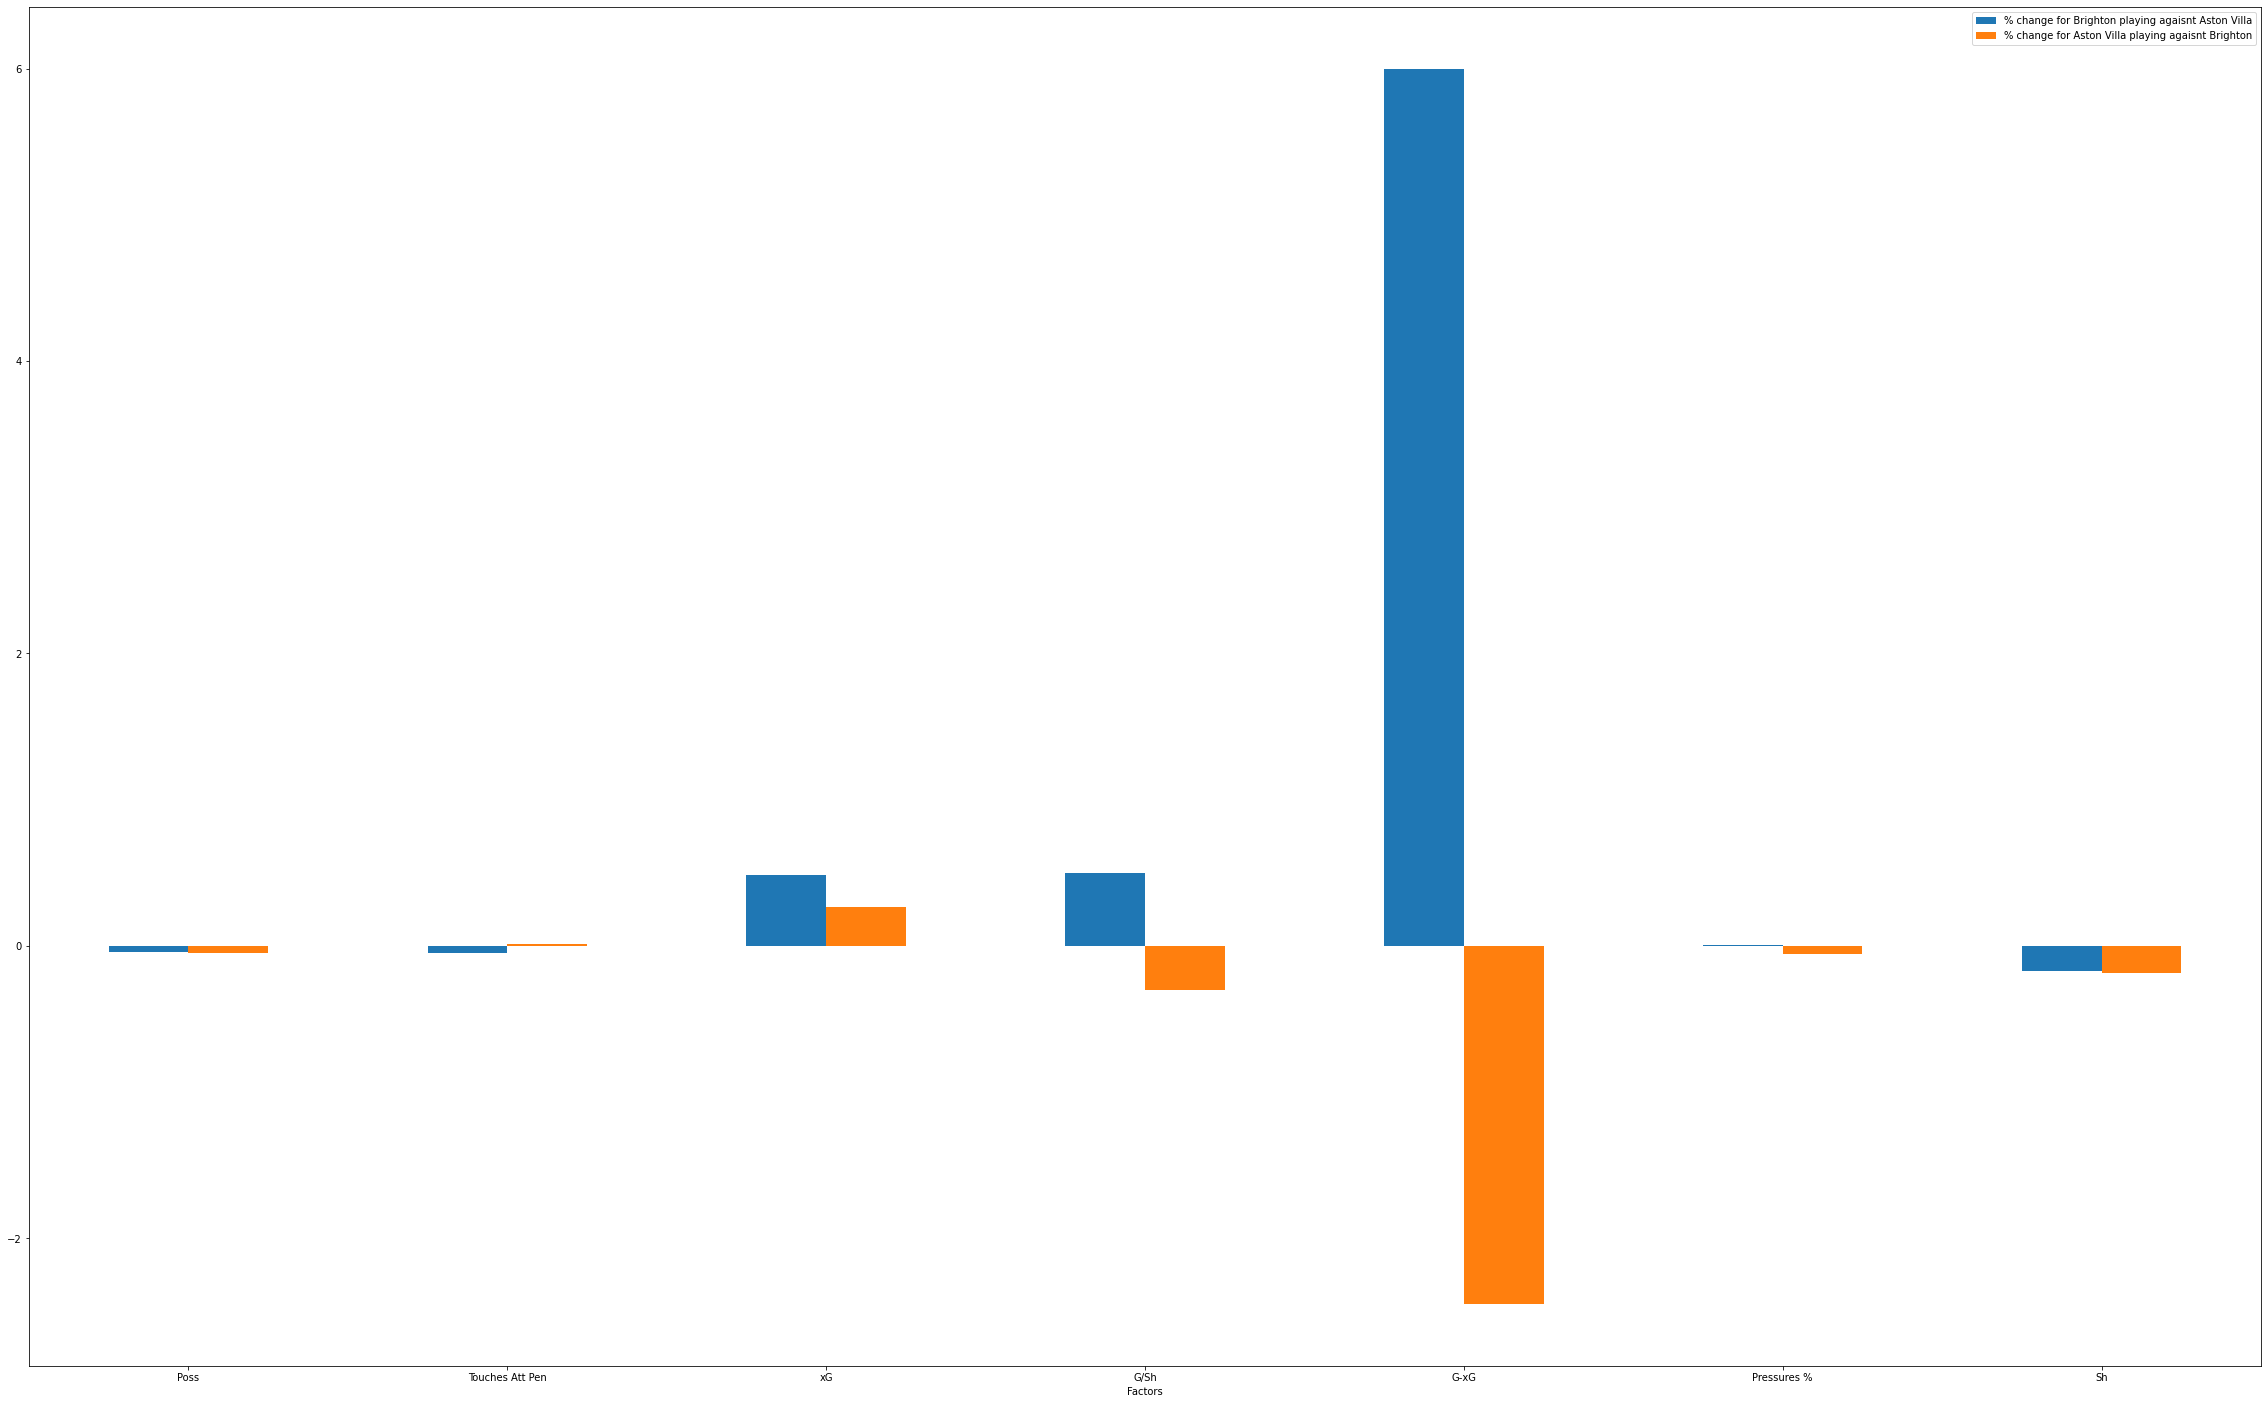

In [10]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import re
from webdriver_manager.chrome import ChromeDriverManager
from collections import defaultdict
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from send2trash import send2trash
from webdriver_manager.chrome import ChromeDriverManager
import pytz




# Get newest fixtures
def update_fixtures_fix(team1, team2, update):
    if update == True:
        PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

        driver = webdriver.Chrome(ChromeDriverManager().install())

        driver.get("https://fixturedownload.com/download/epl-2021-GMTStandardTime.csv")

        time.sleep(5)

        df = pd.read_csv (r'/Users/jordandass/Downloads/epl-2021-GMTStandardTime.csv')

        send2trash(r'/Users/jordandass/Downloads/epl-2021-GMTStandardTime.csv')

        driver.quit()

        fixture = df
        df.to_csv("fixtures_raw.csv")
        round_number_list = []
        for team in [team1, team2]:
            team_dat = df[((df['Home Team'] == team1)|(df["Away Team"] == team1))]
            for num in range(len(team_dat)):
                if type(team_dat.iloc[num, 7]) == str:
                    round_number = team_dat.iloc[num, 2]
            round_number_list.append(round_number)
        return round_number_list
    else:
        df = pd.read_csv("fixtures_raw.csv")
        round_number_list = []
        for team in [team1, team2]:
            team_dat = df[((df['Home Team'] == team1)|(df["Away Team"] == team1))]
            for num in range(len(team_dat)):
                if type(team_dat.iloc[num, 7]) == str:
                    round_number = team_dat.iloc[num, 2]
            round_number_list.append(round_number)
        return round_number_list
    
def update_when_necessary_fix(team1, team2):
    os.chdir(r"/Users/jordandass/FPL/All stats")
    array_not_played = []
    time = pd.read_csv("fixtures_raw.csv")
    for num in range(len(time)):
        if type(time.iloc[num, 7]) == float:
            os.chdir(r"/Users/jordandass/FPL/All stats")
            if pd.to_datetime(time.iloc[num, 3]) < pd.to_datetime(datetime.utcnow().strftime("%Y-%d-%m %H:%M:%S")):
                return update_fixtures_fix(team1, team2, update = True)
            else:
                return update_fixtures_fix(team1, team2, update = False)
            break

def two_team_analysis(team1, team2):
    rank_list_1, rank_list_2 = [], []
    team1_normally, team1_agaisnt, team2_normally, team2_agaisnt = [], [], [], []
    team1_normally_str = team1 + ' normally'
    team1_agaisnt_str = 'Teams agaisnt ' + team2
    vs_team1 = 'vs '+team1

    team2_normally_str = team2 + ' normally'
    team2_agaisnt_str = 'Teams agaisnt ' + team1
    vs_team2 = 'vs '+team2

    poss_important_factors = ['Poss', 'Touches Att Pen']
    os.chdir(r"/Users/jordandass/FPL/All stats")
    poss_df = pd.read_csv("Teams_poss_data.csv")
    opp_poss_df = pd.read_csv("Opponent_poss_data_agaisnt_team.csv")
    for factor in poss_important_factors:
        sorted_poss_df = poss_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_poss_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(poss_df[poss_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_poss_df[opp_poss_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(poss_df[poss_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_poss_df[opp_poss_df["Squad"] == vs_team1][factor].values[0])

    shoot_important_factors = ['xG', 'G/Sh', 'G-xG']
    os.chdir(r"/Users/jordandass/FPL/All stats")
    shoot_df = pd.read_csv("Teams_shot_data.csv")
    opp_shoot_df = pd.read_csv("Opponent_shot_data_agaisnt_team.csv")
    for factor in shoot_important_factors:
        sorted_shoot_df = shoot_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_shoot_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(shoot_df[shoot_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_shoot_df[opp_shoot_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(shoot_df[shoot_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_shoot_df[opp_shoot_df["Squad"] == vs_team1][factor].values[0])

    def_important_factors = ['Pressures %', 'Sh']
    os.chdir(r"/Users/jordandass/FPL/All stats")
    def_df = pd.read_csv("Teams_def_data.csv")
    opp_def_df = pd.read_csv("Opponent_def_data_agaisnt_team.csv")
    for factor in def_important_factors:
        sorted_def_df = def_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_def_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(def_df[def_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_def_df[opp_def_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(def_df[def_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_def_df[opp_def_df["Squad"] == vs_team1][factor].values[0])

    columns = poss_important_factors + shoot_important_factors + def_important_factors
    display(pd.DataFrame({'Factors':columns , team1: rank_list_1, team2:rank_list_2}))

    team1_df = pd.DataFrame({'Factors':columns, team1_normally_str: team1_normally, team1_agaisnt_str: team1_agaisnt})
    check_list = []
    percent_list1 = []
    for factor in team1_df['Factors']:
        percent_list1.append((team1_df[team1_df["Factors"] == factor][team1_agaisnt_str].values[0] - team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0])/team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0])
        if team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0] < team1_df[team1_df["Factors"] == factor][team1_agaisnt_str].values[0]:
            check_list.append('Higher')
        else:
            check_list.append('Lower')

    team1_df["Higher/Lower"] = check_list
    team1_df["% change"] = percent_list1
    display(team1_df)


    team2_df = pd.DataFrame({'Factors':columns, team2_normally_str: team2_normally, team2_agaisnt_str: team2_agaisnt})
    check_list = []
    percent_list2 = []
    for factor in team2_df['Factors']:
        percent_list2.append((team2_df[team2_df["Factors"] == factor][team2_agaisnt_str].values[0] - team2_df[team2_df["Factors"] == factor][team2_normally_str].values[0])/team2_df[team2_df["Factors"] == factor][team2_normally_str].values[0])
        if team2_df[team1_df["Factors"] == factor][team2_normally_str].values[0] < team2_df[team2_df["Factors"] == factor][team2_agaisnt_str].values[0]:
            check_list.append('Higher')
        else:
            check_list.append('Lower')
    team2_df["Higher/Lower"] = check_list
    team2_df["% change"] = percent_list2
    display(team2_df)

    percent_change_team1_str = '% change for ' + team1 + ' playing agaisnt ' + team2
    percent_change_team2_str = '% change for ' + team2 + ' playing agaisnt ' + team1
    combined_percent_df = pd.DataFrame({'Factors':columns, percent_change_team1_str:percent_list1, percent_change_team2_str:percent_list2})

    barplot1 = combined_percent_df.set_index("Factors").plot.bar(rot=0, figsize=(40, 25))

    positions = ['GK', 'DF', 'MF', 'FW']
    formations = [1, 5, 5, 4]
    os.chdir(r"/Users/jordandass/FPL/All stats")
    shoot_df = pd.read_csv("Player_shot.csv")
    round_number = update_when_necessary_fix(team1, team2)
    number = 0
    for team in [team1, team2]:
        full_team = shoot_df[shoot_df["Squad"] == team]
        for pos, num in zip(positions, formations):
            filter_pos = full_team.Pos.str.contains(pos)
            played_players = full_team[filter_pos].sort_values(by = '90s', ascending = False).head(num)
            often_selected_players = played_players[played_players["90s"] > (round_number[number] - 3)]
            print(pos)
            display(often_selected_players)
        number += 1
            
two_team_analysis('Brighton', 'Aston Villa') 

In [31]:
import pytz
from datetime import datetime

datetime.utcnow().strftime("%Y-%d-%m %H:%M:%S")


'2021-03-11 00:28:49'